In [36]:
import numpy as np
from scipy import stats as ss
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d


In [37]:
mu = 2
sigma = 1

mu_range = (0,10)
sigma_range = (.1,10)

data_size = 10

In [38]:
def sample_prior(mu=mu,sigma=sigma,n=1):
    '''
    return the prior as
    (mu,sigma)
    or return n pairs of theta
    '''
    if n == 1:
        return np.random.uniform(*mu_range), np.random.uniform(*sigma_range)
    return np.array([np.random.uniform(*mu_range,n), np.random.uniform(*sigma_range,n)]).T

In [39]:
def data_generation(mu=mu,sigma=sigma, n=data_size):
    return np.random.normal(loc=mu,scale=sigma,size=n)

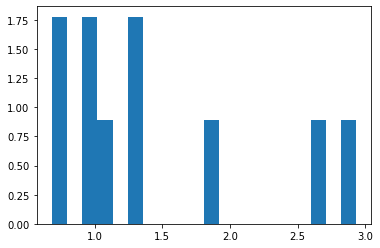

In [40]:
data = data_generation()
plt.hist(data,bins=20,density=True)
print()

In [41]:
def prior(mu,sigma):
    '''
    this returns pi(mu,sigma), 
    which is uniform in the current situation, so I'd just return a constant
    ❕
    '''

    return 1/((sigma_range[1]-sigma_range[0])*(mu_range[1]-mu_range[0]))



def pdf(mu,sigma):
    '''
    this returns the pdf of a 1-dim gaussian with mu and sigma
    '''
    return lambda x: np.exp(-(((x-mu)**2)/(2*sigma**2)))/np.sqrt(2*np.pi*sigma**2)

def log_pdf(mu,sigma):
    return lambda x: -(((x-mu)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

def likelyhood(mu,sigma,data):
    '''
    this returns P(data|mu,sigma), or the L(mu,sigma; data)
    '''
    
    p = pdf(mu,sigma)
    return np.prod([p(x) for x in data])


def log_likelyhood(mu,sigma,data):
    '''
    this returns P(data|mu,sigma), or the L(mu,sigma; data)
    '''
    
    p = log_pdf(mu,sigma)
    return np.sum([p(x) for x in data])


def Z(data):
    '''
    this tries to return the P(X). 
    but it is indeed not trackable. 
    so I will just return a constant 1
    as long as the mcmc is correct up to a propotion
    this is fine. 
    ❕
    '''

    return 1

def posterior(mu,sigma,data):
    return prior(mu,sigma)*likelyhood(mu,sigma,data)/Z(data)


def log_posterior(mu,sigma,data):
    return np.log(prior(mu,sigma)) + log_likelyhood(mu,sigma,data)- np.log(Z(data))



---

#### plotting the posterior just to get a sense



In [49]:
mu_ls = np.linspace(*mu_range,500)
sigma_ls = np.linspace(*sigma_range,500)
theta_ls = np.array([(mu,sigma) for mu in mu_ls for sigma in sigma_ls])
posterior_ls = [posterior(mu,sigma,data) for mu,sigma in theta_ls]

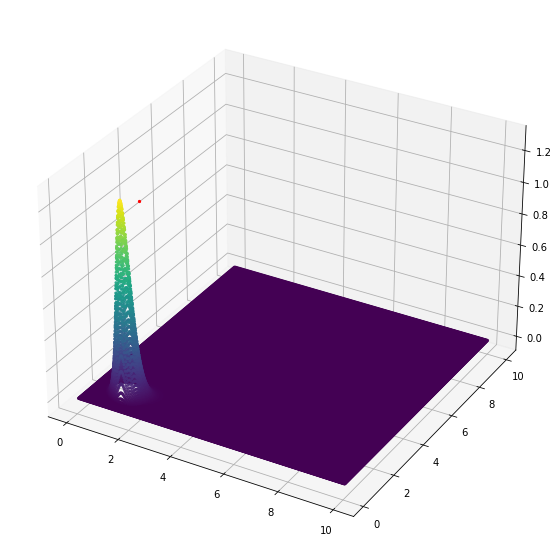

In [50]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(theta_ls[:,0],theta_ls[:,1],posterior_ls,c=posterior_ls,s=4)
ax.scatter3D([2,],[1,],[max(posterior_ls),],c='r',s=5)

#### or better with this 2d heat diagram. 

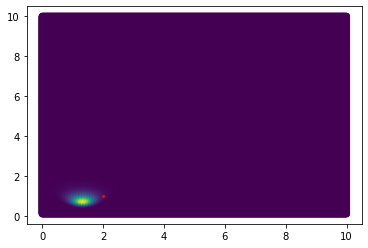

In [51]:
ax = plt.axes()
ax.scatter(theta_ls[:,0],theta_ls[:,1],c=posterior_ls)
ax.scatter([2,],[1,],c='r',s=4)

the maximal a posterior point lies around this 

Why? My data size is only about 20. If I choose a larger data size, the likelyhood would just go straight to almost 0, and hence be hard to observe. this small data size adds a lot of uncertainty of my plot. 

---

#### Observations
1. probably I should use log likelyhood. many of the probability turns out to be zero.. 
2. there are boundary of my parameter space. So I should be cautious about not hitting the boundary when designing the M(RT)^2. 



In [ ]:
def mrt(init=None, n=10000):
    if init is None:
        init = sample_prior()
    samples = [init]
    curr = init
    for i in range(n):


